In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import GridSearchCV,cross_val_score,learning_curve,train_test_split
from sklearn.metrics import precision_score,roc_auc_score,recall_score,confusion_matrix,roc_curve,precision_recall_curve
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objects as go
import warnings
import plotly.figure_factory as ff
from plotly.offline import iplot

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")


In [23]:
from google.colab import files 
  
uploaded = files.upload()

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (3).csv


In [24]:
import io 
df = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv'])) 
print(df)

      Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [26]:
pd.set_option("display.float_format","{:.2f}".format)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00
mean,36.92,802.49,9.19,2.91,1.00,1024.87,2.72,65.89,2.73,2.06,2.73,6502.93,14313.10,2.69,15.21,3.15,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,1.10,4707.96,7117.79,2.50,3.66,0.36,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,1.00,1009.00,2094.00,0.00,11.00,3.00,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,2.00,2911.00,8047.00,1.00,12.00,3.00,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,1020.50,3.00,66.00,3.00,2.00,3.00,4919.00,14235.50,2.00,14.00,3.00,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,1157.00,14.00,4.00,1.00,1555.75,4.00,83.75,3.00,3.00,4.00,8379.00,20461.50,4.00,18.00,3.00,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,1499.00,29.00,5.00,1.00,2068.00,4.00,100.00,4.00,5.00,4.00,19999.00,26999.00,9.00,25.00,4.00,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [29]:
null_feat = pd.DataFrame(len(df['Attrition'])- df.isnull().sum(), columns=['Count'])

trace=go.Bar(x=null_feat.index,y=null_feat['Count'],opacity=0.8,marker=dict(color='lightgrey',line=dict(color='red',width=1.5)))

layout=dict(title="Missig Values")
fig=dict(data=[trace],layout=layout)
py.iplot(fig)

In [31]:
df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis="columns",inplace=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [34]:
categorical_col=[]
for column in df.columns:
  if df[column].dtype==object and len(df[column].unique())<=50:
    categorical_col.append(column)
    print(f"{column}:{df[column].unique()}")
    print("-------")

Attrition:['Yes' 'No']
-------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-------
Department:['Sales' 'Research & Development' 'Human Resources']
-------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-------
Gender:['Female' 'Male']
-------
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
-------
MaritalStatus:['Single' 'Married' 'Divorced']
-------
OverTime:['Yes' 'No']
-------


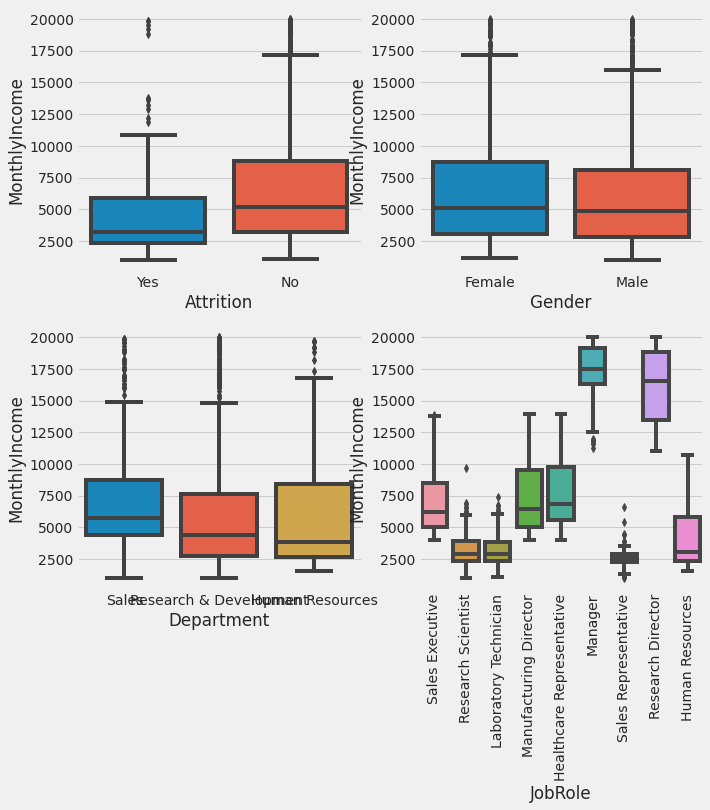

In [35]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.boxplot(df['Attrition'],df['MonthlyIncome'],ax=ax[0,0])
sns.boxplot(df['Gender'],df['MonthlyIncome'],ax=ax[0,1])
plt.xticks(rotation=90)
sns.boxplot(df['Department'],df['MonthlyIncome'],ax=ax[1,0])
plt.xticks(rotation=90)
sns.boxplot(df['JobRole'],df['MonthlyIncome'],ax=ax[1,1])
plt.show()


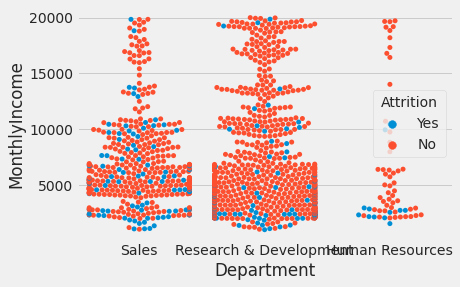

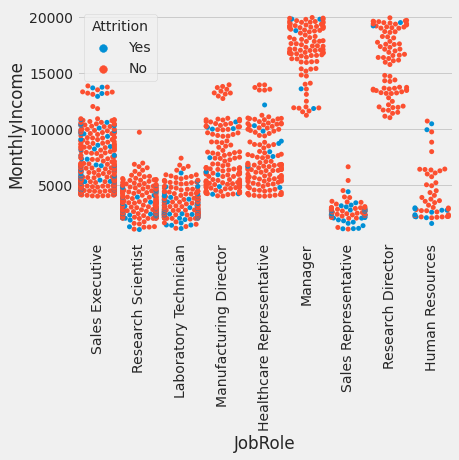

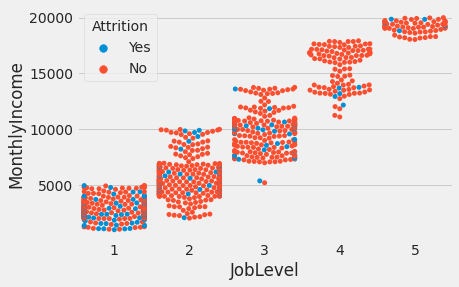

In [36]:
 sns.swarmplot(x="Department",y="MonthlyIncome",hue="Attrition",data=df);
 plt.show()

 sns.swarmplot(x="JobRole",y="MonthlyIncome",hue="Attrition",data=df);
 plt.xticks(rotation=90)
 plt.show()

 sns.swarmplot(x="JobLevel",y="MonthlyIncome",hue="Attrition",data=df);
 plt.show()

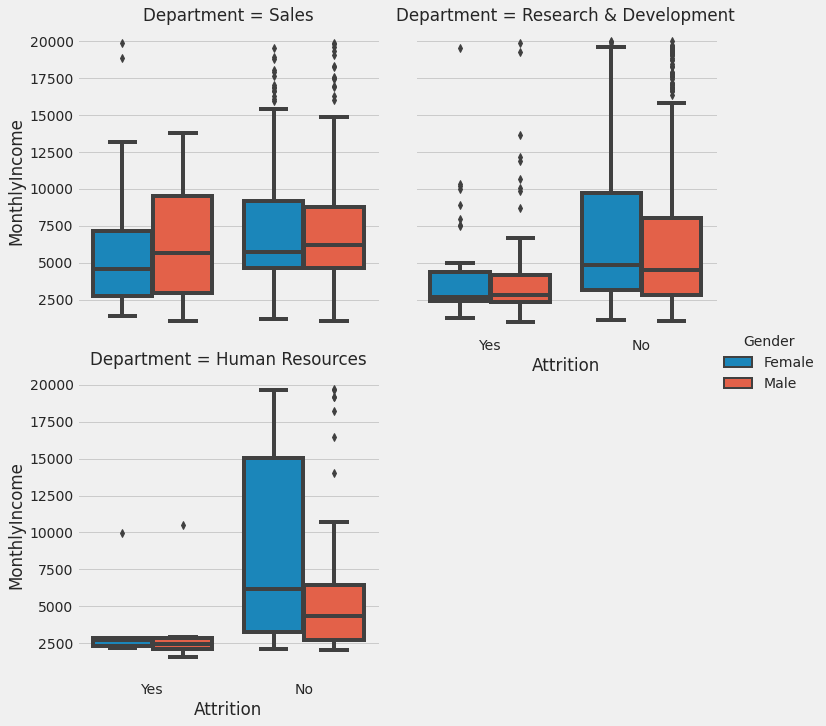

In [37]:
sns.factorplot(x='Attrition',y='MonthlyIncome',hue='Gender',col='Department',col_wrap=2,kind='box',data=df)
plt.show()

In [38]:
df['Attrition']=df.Attrition.astype("category").cat.codes

In [39]:
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

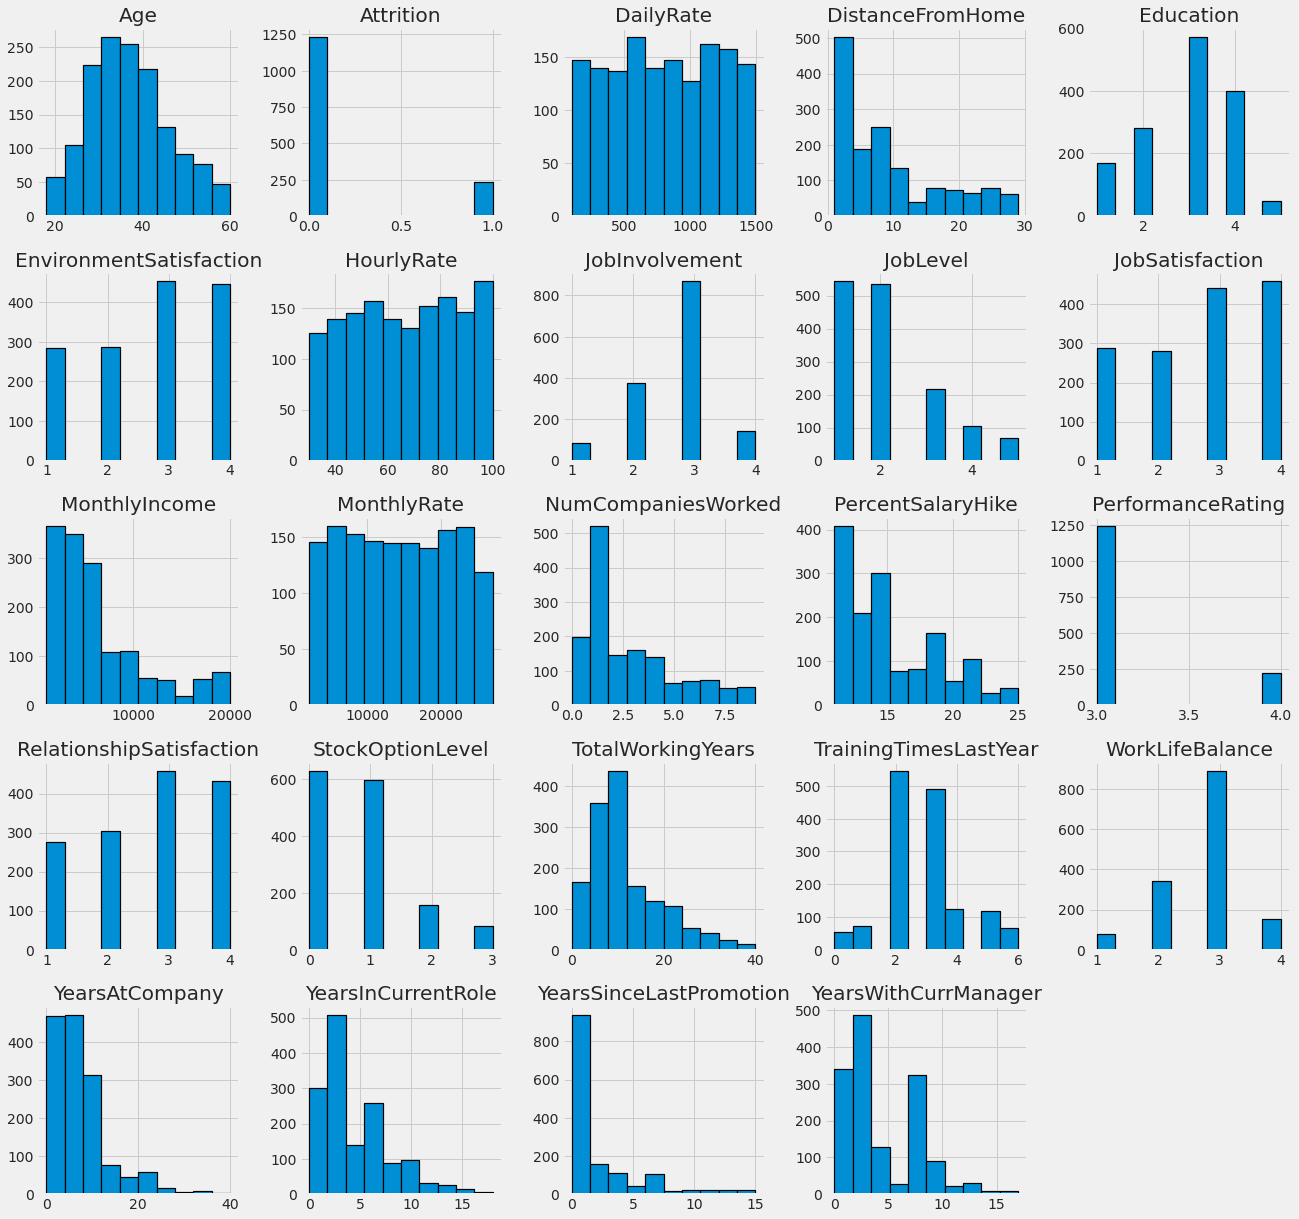

In [40]:
df.hist(edgecolor='black',linewidth=1.2,figsize=(20,20));

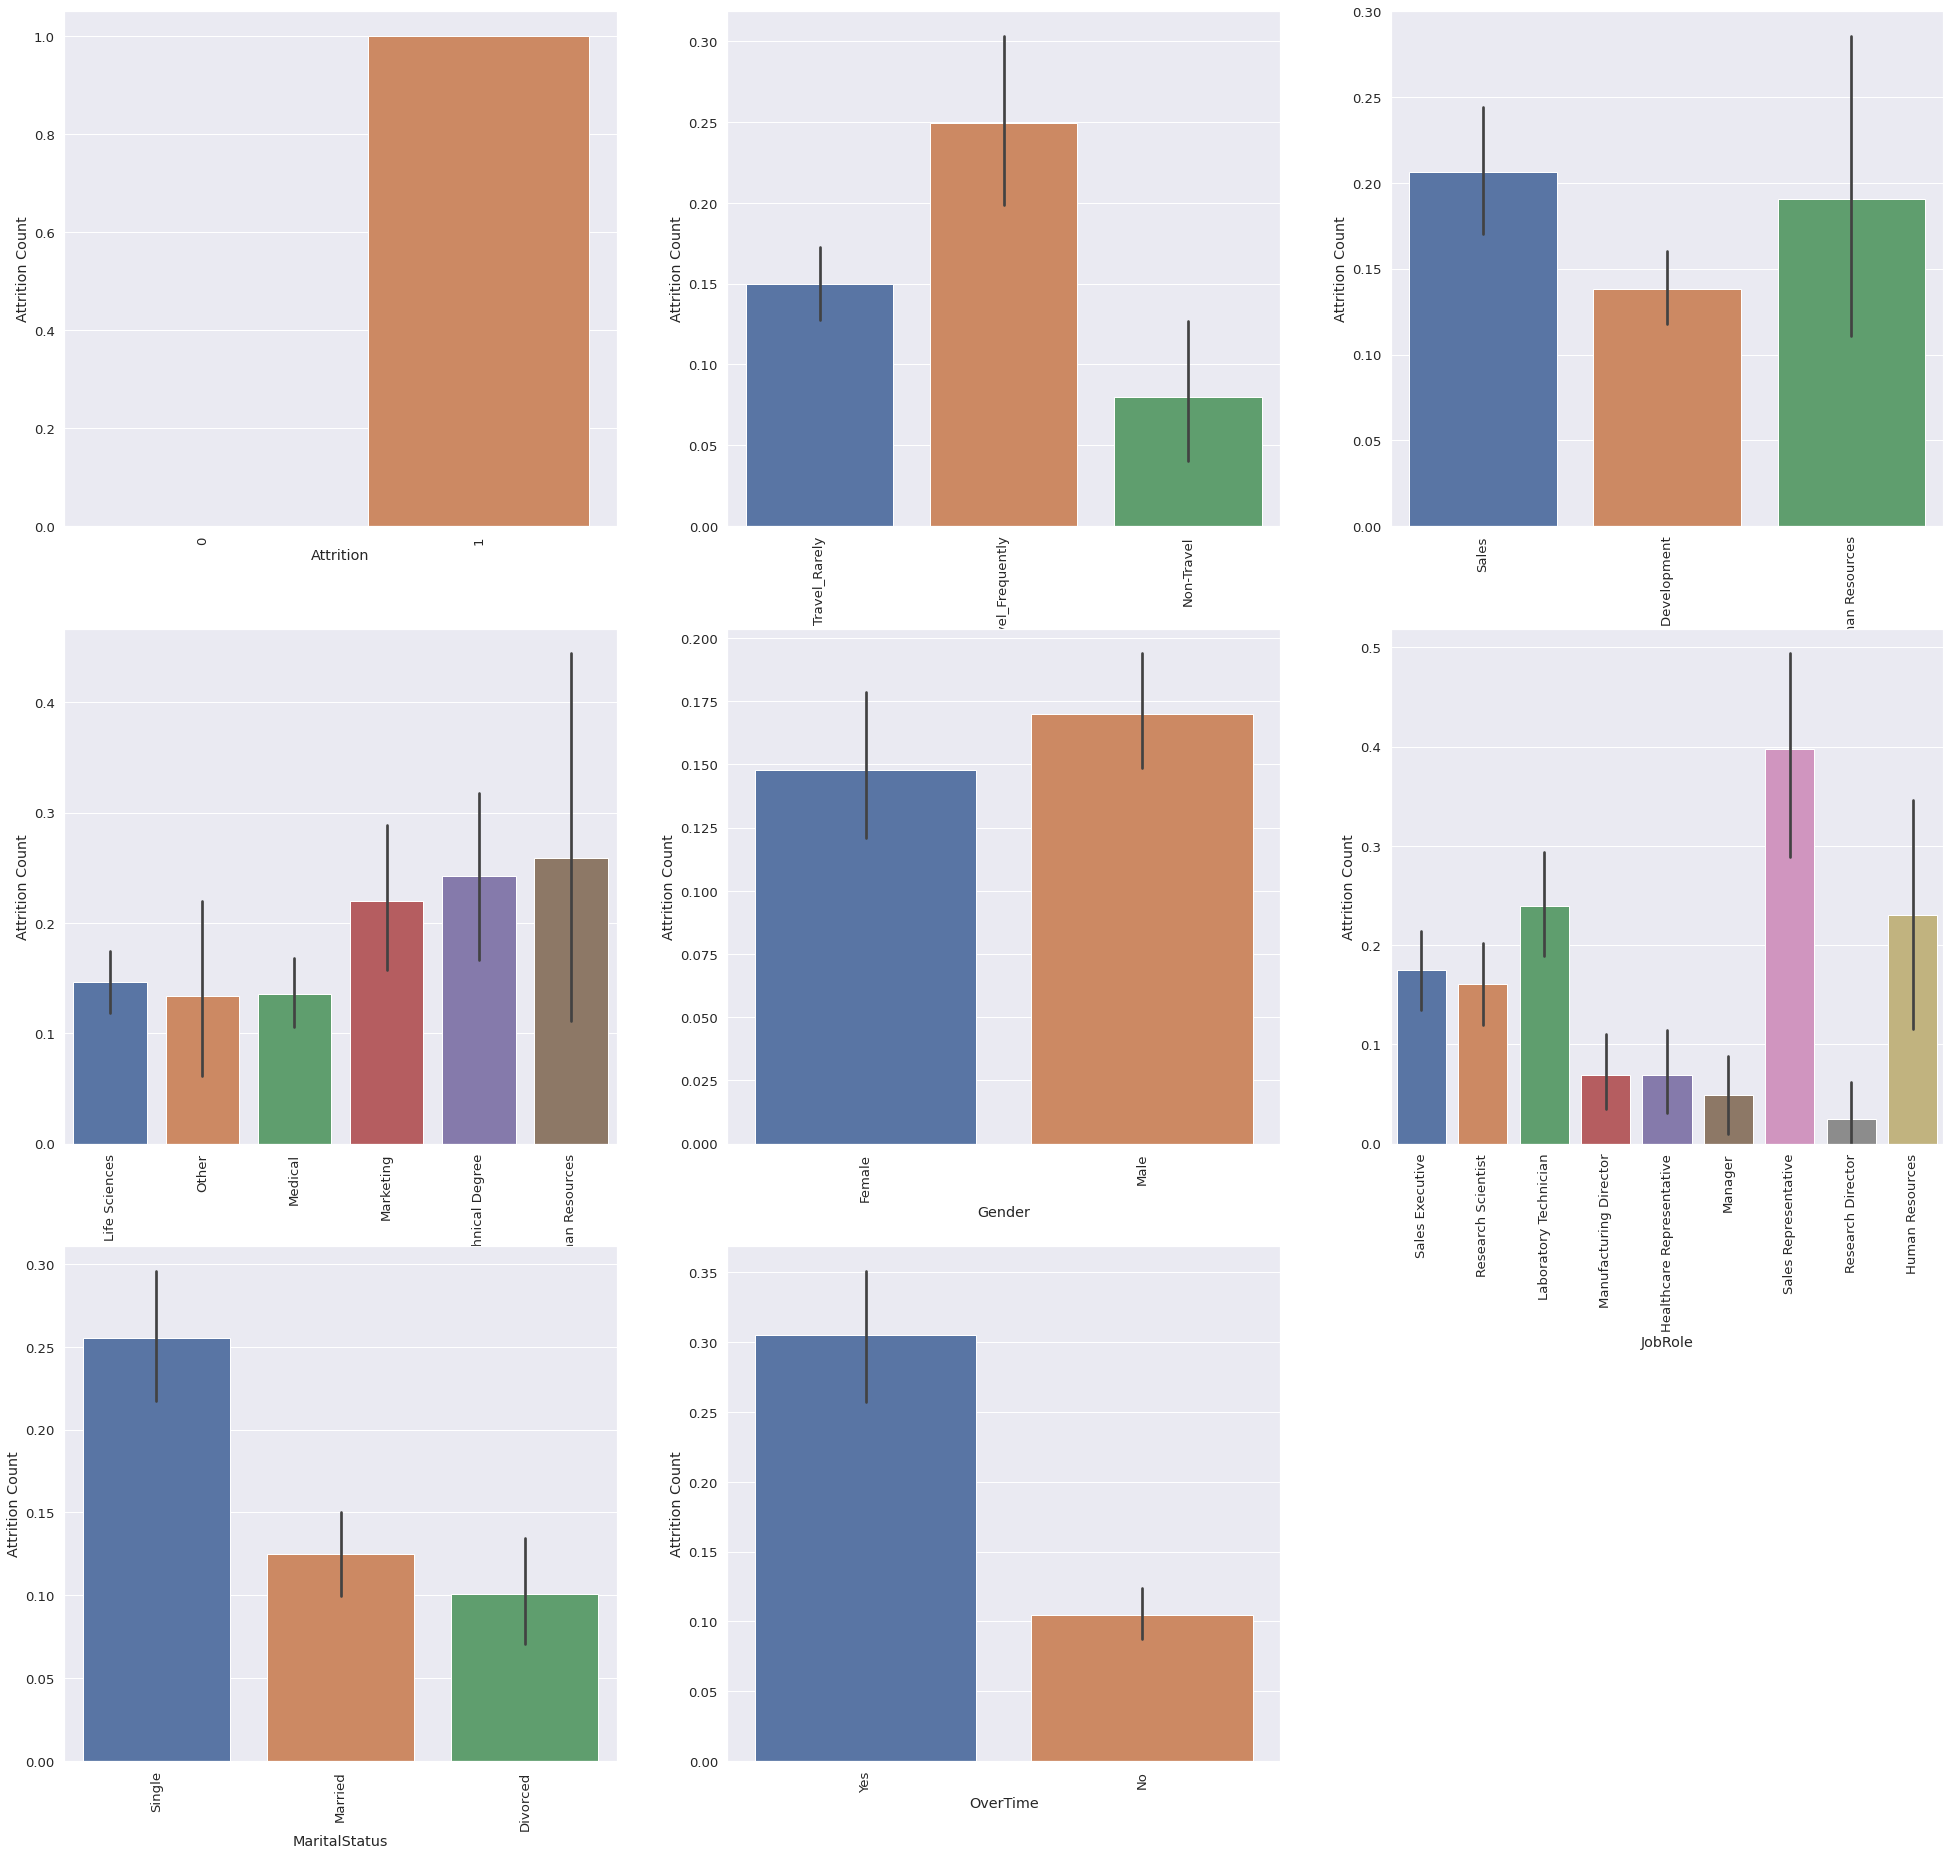

In [42]:
sns.set(font_scale=1.2)
plt.figure(figsize=(30,30))

for i, column in enumerate(categorical_col,1):
  plt.subplot(3,3,i)
  g=sns.barplot(x=f"{column}",y='Attrition',data=df)
  g.set_xticklabels(g.get_xticklabels(),rotation=90)
  plt.ylabel('Attrition Count')
  plt.xlabel(f'{column}')

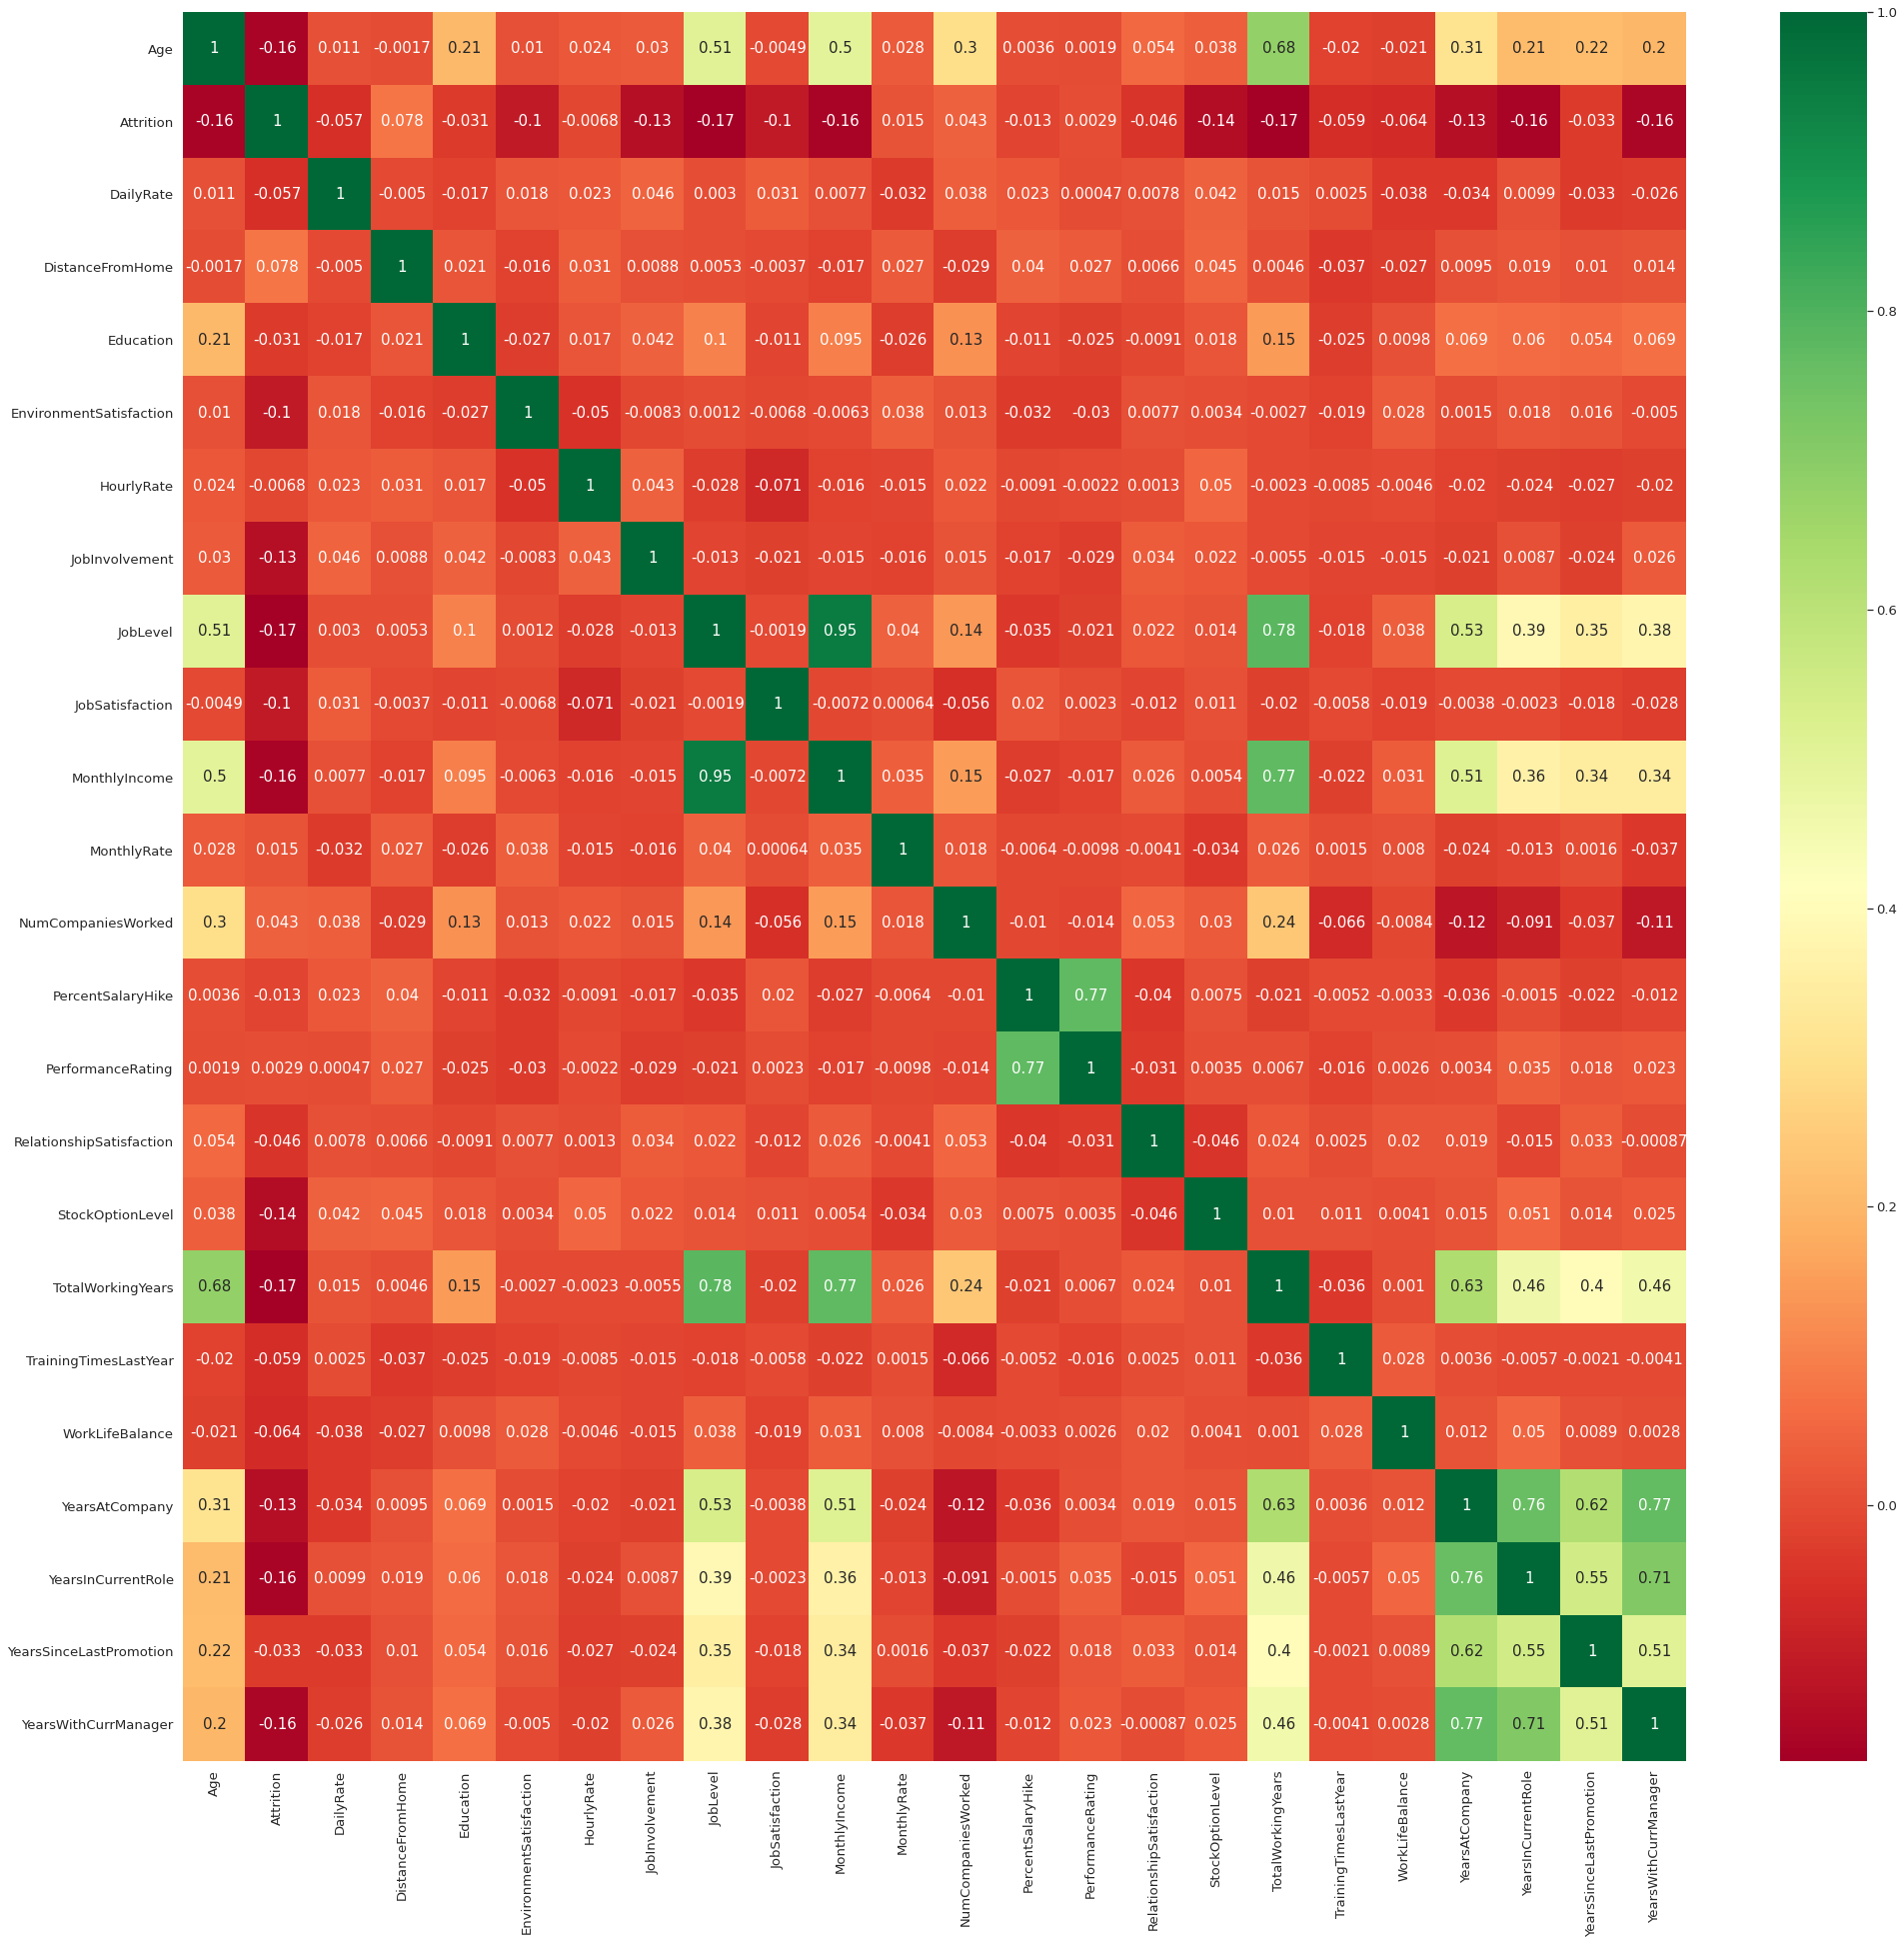

In [43]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn",annot_kws={"size":15})


In [44]:
categorical_col.remove('Attrition')

In [45]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for column in categorical_col:
  df[column]=label.fit_transform(df[column])

In [47]:
X=df.drop('Attrition',axis=1)
y=df.Attrition

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

def print_score(clf,X_train,y_train,X_test,y_test,train=True):
  if train:
    pred=clf.predict(X_train)
    print("Train Result:\n--------")
    print(f"accuracy score :{accuracy_score(y_train,pred):.4f}\n")
    print(f"Classification Report: \n \tPrecision:{precision_score(y_train,pred)}")
    print(f"Confusion Matrix :\n {confusion_matrix(y_train,clf.predict(X_train))}")

  elif train==False:
    pred=clf.predict(X_test)
    print("Train Result:\n--------")
    print(f"accuracy score :{accuracy_score(y_test,pred):.4f}\n")
    print(f"Classification Report: \n \tPrecision:{precision_score(y_test,pred)}")
    print(f"Confusion Matrix :\n {confusion_matrix(y_test,pred)}")


In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

tree= DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

print_score(tree,X_train,y_train,X_test,y_test,train=True)
print_score(tree,X_train,y_train,X_test,y_test,train=False)


Train Result:
--------
accuracy score :1.0000

Classification Report: 
 	Precision:1.0
Confusion Matrix :
 [[853   0]
 [  0 176]]
Train Result:
--------
accuracy score :0.7778

Classification Report: 
 	Precision:0.2597402597402597
Confusion Matrix :
 [[323  57]
 [ 41  20]]


In [51]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot

features=list(df.columns)
features.remove("Attrition")

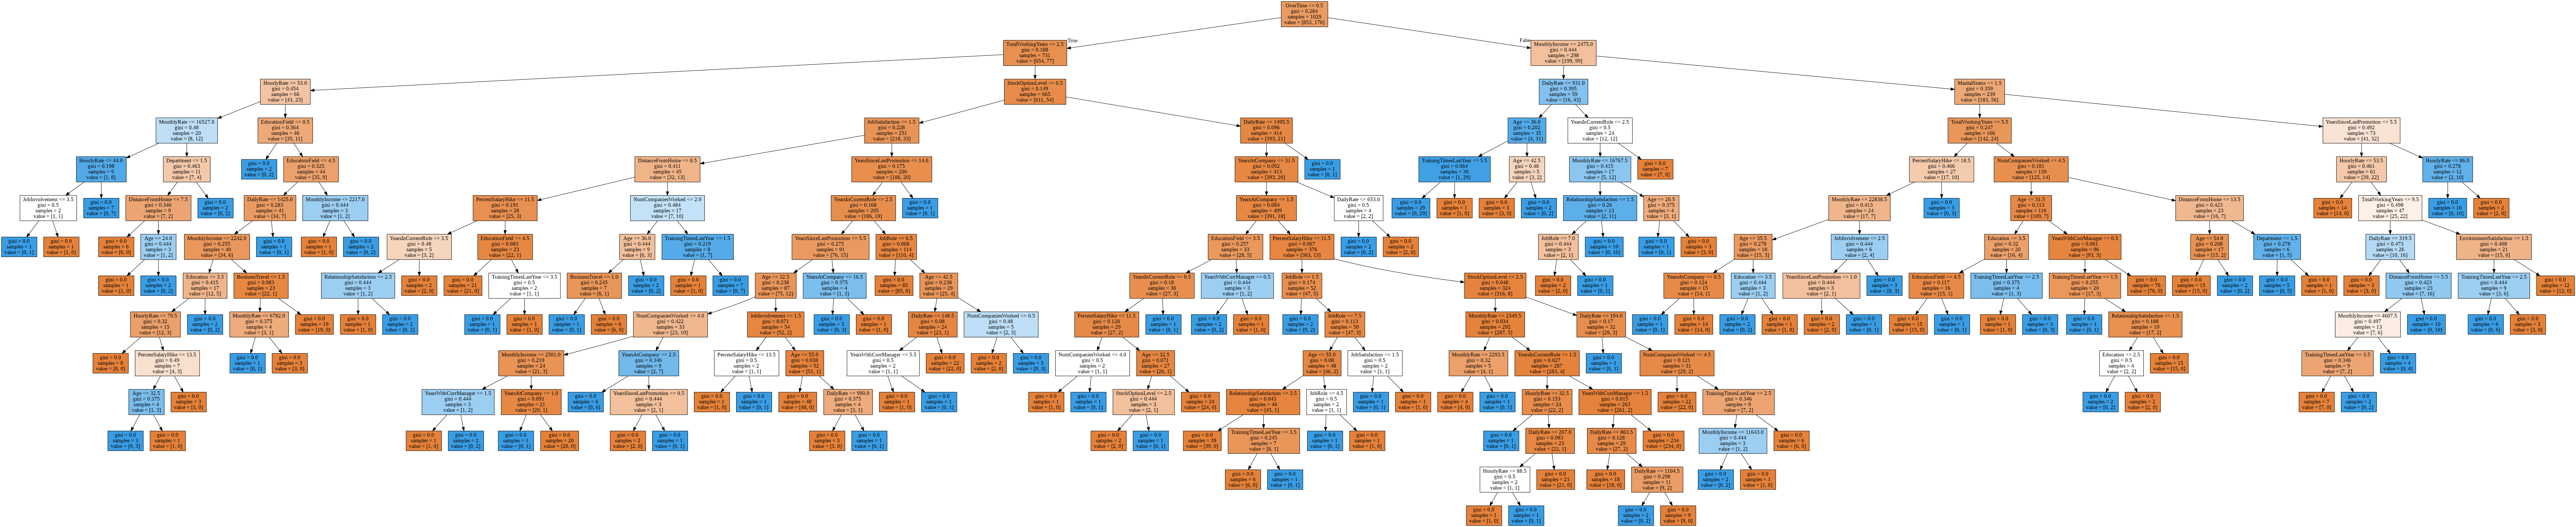

In [52]:
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [53]:
from sklearn.ensemble import RandomForestClassifier

rand_forest= RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train,y_train)

print_score(rand_forest,X_train,y_train,X_test,y_test,train=True)
print_score(rand_forest,X_train,y_train,X_test,y_test,train=False)

Train Result:
--------
accuracy score :1.0000

Classification Report: 
 	Precision:1.0
Confusion Matrix :
 [[853   0]
 [  0 176]]
Train Result:
--------
accuracy score :0.8685

Classification Report: 
 	Precision:0.6363636363636364
Confusion Matrix :
 [[376   4]
 [ 54   7]]
